## Imports

In [2]:
from IPython.display import Javascript
import ipywidgets as widgets

# Data
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

## **Questions**

-  'n's 
- 

### Load the data

In [3]:
path = "../master-thesis/data/uke_data_wide.parquet"

# Load the dataset
uke_df = pd.read_parquet(path)
print("Dataset loaded...")

Dataset loaded...


### Datatypes and samples

In [4]:
# Shape of the dataframe
print("Uke dataframe shape (rows,columns): ", uke_df.shape)

Uke dataframe shape (rows,columns):  (591627, 85)


In [65]:
# Description of the columns
print('Data: '+'\x1b[1;31m'+'uke_df'+'\x1b[0m'+ ", nrows: {}, ncols: {}".format(uke_df.shape[0],uke_df.shape[1]))
print("\033[1m\033[4m\033[95m{:<27} :  {:<7}  {:<50} |  {:<9} {:<9} {:<10} {:<6} ({}%)\033[0m".format("column", "type", "samples", "Mean", "Min", "Max", "Nans", "Nans%"))
for column in uke_df.columns:
    
    column_type = str(uke_df.dtypes[column])
    
    samples = uke_df[column].dropna().sample(10).tolist()
    if column_type == "string":
        samples = ["'"+value+"'" for value in samples]
        samples = "  ".join([str(value) for value in samples])[:50]
    else:
        samples = "  ".join([str(round(value,2)) for value in samples])[:50]
    
    mean = "-"
    mini = "-"
    maxi = "-"
    if column_type != "string":
        mean = round(uke_df[column].mean(),2)
        mini = round(uke_df[column].min(),2)
        maxi = round(uke_df[column].max(),2)
    
    nans_perc = round(uke_df[column].isnull().sum() * 100 / len(uke_df[column]),1)
    nans = uke_df[column].isnull().sum()
    
    out = "{:<27} :  {:<7}  {:<50} |  {:<9} {:<9} {:<10} {:<6} ({}%)".format(column, column_type, samples, str(mean), str(mini), str(maxi), nans, nans_perc)
    print(out)

Data: uke_df, nrows: 591627, ncols: 85
column                      :  type     samples                                            |  Mean      Min       Max        Nans   (Nans%%)
pat_id                      :  string   '534397592'  '586712988'  '533639788'  '565479761' |  -         -         -          0      (0.0%)
rel_time                    :  int64    14700  2700  5940  45360  3720  13020  21120  3336 |  22819.88  0         3252900    0      (0.0%)
af_vital                    :  float64  16.0  17.56  19.0  24.0  22.0  41.0  25.5  20.33   |  19.9      0.0       148.0      197410 (33.4%)
alt_labor                   :  float64  19.0  49.0  46.0  72.0  107.0  24.0  437.0  259.0  |  130.71    4.0       8430.0     584200 (98.7%)
ast_labor                   :  float64  362.0  22.0  79.0  50.0  67.0  72.0  355.0  35.0   |  189.47    4.0       17431.0    584771 (98.8%)
albumin_labor               :  float64  20.1  20.0  20.5  27.0  30.0  24.0  14.0  13.2  23 |  23.1      2.0       131.84  

In [6]:
# dataframe head
uke_df.head()

,pat_id,rel_time,af_vital,alt_labor,ast_labor,albumin_labor,alk_labor,alpha_blocker_med,barbiturat_med,basophile_labor,...,diast_vital,ft3_labor,ft4_labor,mittl_nbd_vital,mittl_vital,ph_bga,pankreasspez_labor,so2_bga,syst_nbd_vital,syst_vital
0,123456798,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123456798,3120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123456798,13200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123456798,38040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,123456798,43680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# dataframe tail
uke_df.tail()

,pat_id,rel_time,af_vital,alt_labor,ast_labor,albumin_labor,alk_labor,alpha_blocker_med,barbiturat_med,basophile_labor,...,diast_vital,ft3_labor,ft4_labor,mittl_nbd_vital,mittl_vital,ph_bga,pankreasspez_labor,so2_bga,syst_nbd_vital,syst_vital
591622,597077779,1080,29.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.666667,NaN,NaN,NaN,61.666667,NaN,NaN,NaN,NaN,62.666667
591623,597077779,1140,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.000000,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,62.000000
591624,597077779,1200,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.500000,NaN,NaN,NaN,60.500000,NaN,NaN,NaN,NaN,62.000000
591625,597077779,1260,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.500000,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,63.500000
591626,597077779,1320,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.000000,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,65.000000


### Data distribution

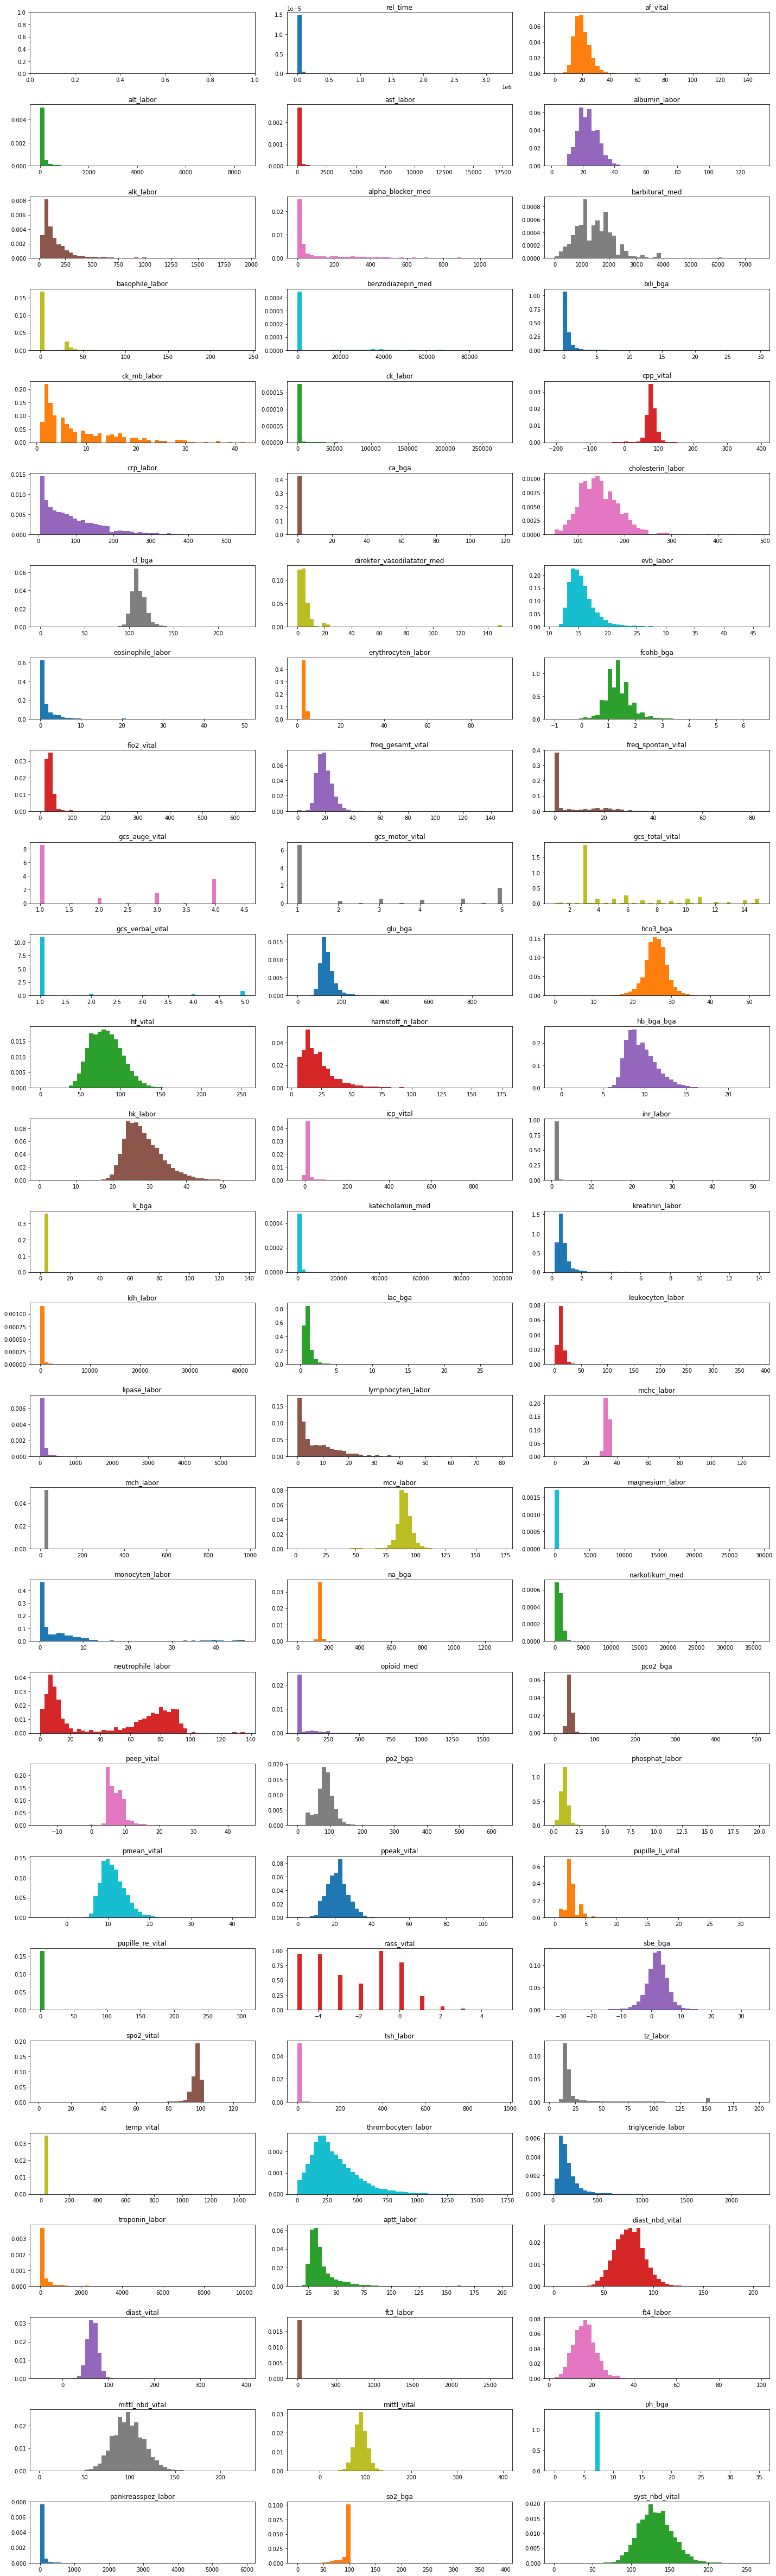

In [11]:
fig, axs = plt.subplots(28, 3)
fig.set_figheight(66)
fig.set_figwidth(20)

colors = plt.rcParams["axes.prop_cycle"]()

for i, ax in enumerate(fig.axes):
        
        if i < len(uke_df.columns) and uke_df.columns[i] != "pat_id":
            
            # get column name
            column_name = uke_df.columns[i]
            print("Creating column {}/{} - {}".format(i, len(uke_df.columns), column_name), end="\r")
            
            # Extract data
            series = uke_df[column_name].dropna()
            
            # Create subplot
            color = next(colors)["color"]
            
            ax.hist(series), density=True, bins=50, color= color)
            ax.set_title(column_name)

            
fig.tight_layout()        
fig.savefig("../master-thesis/figures/column_distribution.png")